# House Loan Data Analysis



#### DESCRIPTION

For safe and secure lending experience, it's important to analyze the past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using the historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

#### Objective: Create a model that predicts whether or not an applicant will be able to repay a loan using historical data.

#### Domain: Finance

##### Analysis to be done: Perform data preprocessing and build a deep learning prediction model.

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load Data

In [51]:
df=pd.read_csv("loan_data.csv")

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(307511, 122)

In [6]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## Check For Null Values

In [52]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [4]:
## Imputing Nulls with Median values
df.fillna(df.median(numeric_only=True).round(1), inplace=True)

In [55]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
df.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

## Finding duplicate values in the dataset

In [33]:
df.duplicated().sum()

0

## Label Encoding the categorical Variables

In [57]:
target = []
for i in df.columns:
    col = df[i]
    if type(col[0]) == str:
        target.append(i)
        print(i)

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


In [5]:
#Label Encoding for classifications
target2=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
from sklearn.preprocessing import LabelEncoder
for i in target2:
    encoder = LabelEncoder()
    encoder.fit(list(df[i]))
    df[i] = encoder.fit_transform(df[i])

In [59]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Checking Data Imbalance

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TARGET', ylabel='count'>

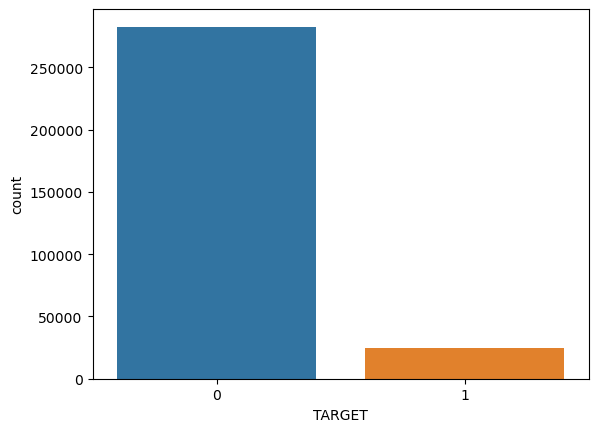

In [60]:
sns.countplot(df.TARGET)

#### Percentage of data where loan is approved and where disapproved

In [42]:
df.TARGET.value_counts()*100/df.shape[0]

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

## Dividing the dataframe into Feature and Target

In [6]:
x=df.iloc[:,3:]
y=df.TARGET

In [62]:
x

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1,0,0,0,157500.0,254700.0,27558.0,225000.0,6,7,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307507,0,0,1,0,72000.0,269550.0,12001.5,225000.0,6,3,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307508,0,0,1,0,153000.0,677664.0,29979.0,585000.0,6,7,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,0,0,1,0,171000.0,370107.0,20205.0,319500.0,6,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Split the data set into training and testing

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [8]:
#Standardizing the Features
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

## Applying SMOTE to resample the target variable

In [9]:
from imblearn.over_sampling import SMOTE
smk = SMOTE()
x_train_smote,y_train_smote=smk.fit_resample(x,y)

In [10]:
print(x_train_smote.shape)
print(y_train_smote.shape)

(565372, 119)
(565372,)


In [11]:
# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_train_smote,y_train_smote, test_size=0.2, random_state=2)

## Principal component Analysis to extract the Important Features

In [12]:
from sklearn.decomposition import PCA
sklearn_PCA=PCA(n_components=0.95)
sklearn_PCA.fit(x_train)
x_train_transformed=sklearn_PCA.transform(x_train)
print(x_train_transformed.shape)

(452297, 3)


In [13]:
x_test_transformed=sklearn_PCA.transform(x_test)
print(x_test_transformed.shape)

(113075, 3)


## ANN for Classification problem

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization,Input
from tensorflow.keras.metrics import Precision, Recall
from livelossplot import PlotLossesKerasTF

In [32]:
model=Sequential()

model.add(Input(shape=(3,)))

model.add(Dense(6,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(6,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(6,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',Precision(),Recall()])

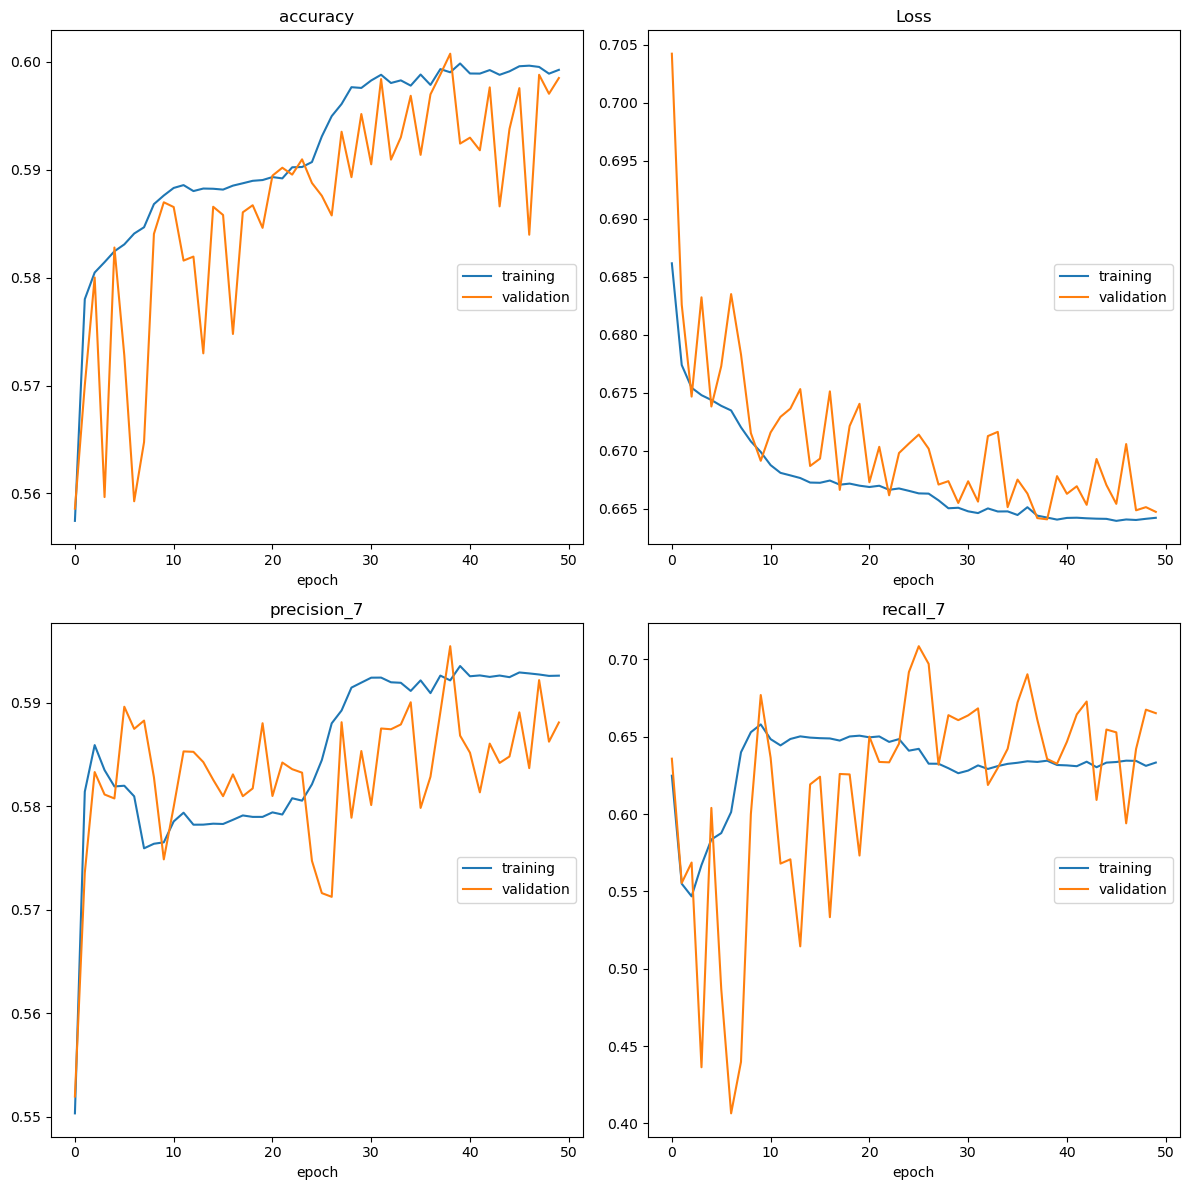

accuracy
	training         	 (min:    0.557, max:    0.600, cur:    0.599)
	validation       	 (min:    0.559, max:    0.601, cur:    0.598)
Loss
	training         	 (min:    0.664, max:    0.686, cur:    0.664)
	validation       	 (min:    0.664, max:    0.704, cur:    0.665)
precision_7
	training         	 (min:    0.550, max:    0.594, cur:    0.593)
	validation       	 (min:    0.552, max:    0.595, cur:    0.588)
recall_7
	training         	 (min:    0.547, max:    0.658, cur:    0.633)
	validation       	 (min:    0.407, max:    0.709, cur:    0.665)
453/453 [==============================] - 2s 5ms/step - loss: 0.6642 - accuracy: 0.5993 - precision_7: 0.5926 - recall_7: 0.6333 - val_loss: 0.6647 - val_accuracy: 0.5985 - val_precision_7: 0.5881 - val_recall_7: 0.6652


In [33]:
model.fit(x_train_transformed,y_train,epochs=50, batch_size=1000,validation_data=(x_test_transformed,y_test),
          callbacks=[PlotLossesKerasTF()])

## Classification Report

In [34]:
from sklearn.metrics import classification_report

In [43]:
train_pred=model.predict(x_train_transformed)
test_pred=model.predict(x_test_transformed)

3534/3534 [==============================] - 5s 1ms/step


In [36]:
print(classification_report(y_train,train_pred))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67    226310
           1       0.00      0.00      0.00    225987

    accuracy                           0.50    452297
   macro avg       0.25      0.50      0.33    452297
weighted avg       0.25      0.50      0.33    452297



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     56376
           1       0.00      0.00      0.00     56699

    accuracy                           0.50    113075
   macro avg       0.25      0.50      0.33    113075
weighted avg       0.25      0.50      0.33    113075



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
y_train.value_counts()

0    226310
1    225987
Name: TARGET, dtype: int64

In [39]:
y_test.value_counts()

1    56699
0    56376
Name: TARGET, dtype: int64

## Calculation of Y-pred

In [44]:
test_pred

array([[0.6368605 ],
       [0.37090275],
       [0.7064471 ],
       ...,
       [0.5595187 ],
       [0.592499  ],
       [0.46580097]], dtype=float32)

In [45]:
print(len(test_pred))

113075


In [46]:
t1 = []
for i in range(len(test_pred)):
    if test_pred[i] >= 0.5:
        t1.append(1)
    else:
        t1.append(0)

In [49]:
y_pred = pd.Series(t1)  
print(y_pred)

0         1
1         0
2         1
3         0
4         0
         ..
113070    0
113071    0
113072    1
113073    1
113074    0
Length: 113075, dtype: int64


## Plot of ROC Curve

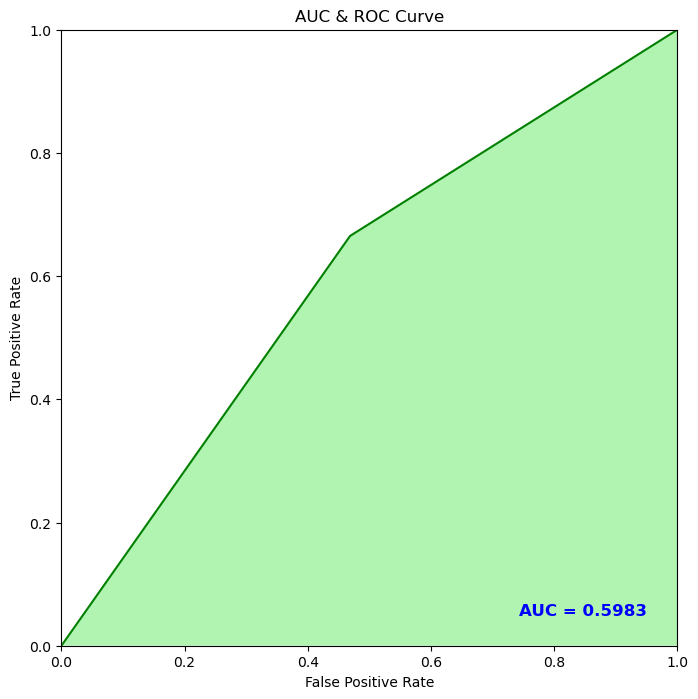

In [50]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()